In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000, noise=0.1, random_state=42)

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

<Axes: >

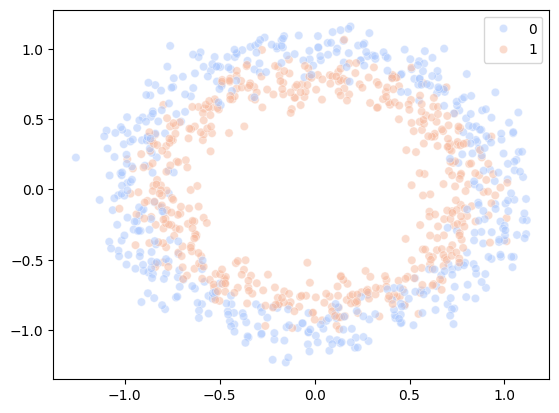

In [5]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', alpha=0.5)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = Sequential()

In [30]:
model.add(Dense(64, activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))

C:\Users\HomePC\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    restore_best_weights = True,
    verbose = 1,
    min_delta = 0.0001,
    mode = 'auto',
    baseline = None
)

In [33]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks = callback)

Epoch 1/1000


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4338 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6903
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4906 - loss: 0.6851 - val_accuracy: 0.5000 - val_loss: 0.6765
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6419 - loss: 0.6482 - val_accuracy: 0.6900 - val_loss: 0.6529
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8127 - loss: 0.5995 - val_accuracy: 0.7450 - val_loss: 0.6165
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8518 - loss: 0.5273 - val_accuracy: 0.6900 - val_loss: 0.6352
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8356 - loss: 0.5009 - val_accuracy: 0.7050 - val_loss: 0.6338
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8508 - loss: 0.4455 - val_accuracy: 0.7200 - val_loss: 0.6106
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8360 - loss: 0.4171 - val_accuracy: 0.6950 - val_l

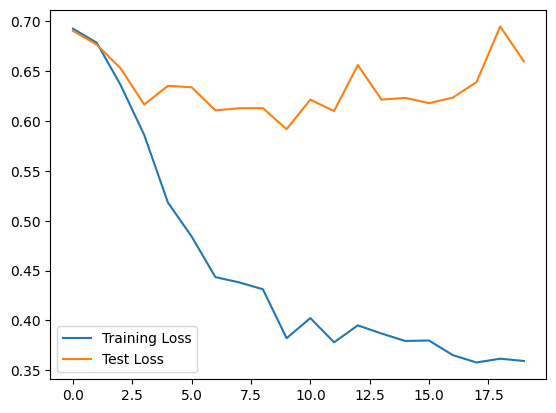

In [34]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()